In [8]:
import numpy as np
import cv2
from cv2 import dnn_superres
import matplotlib.pyplot as plt

shape: (160, 160, 3)


(-0.5, 159.5, 159.5, -0.5)

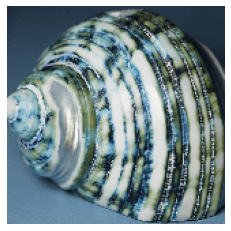

In [15]:
# load the image

image = cv2.imread('image.png')
plt.imshow(image)
print("shape:", image.shape)
plt.axis('off')

## Classical upscaling (2x)

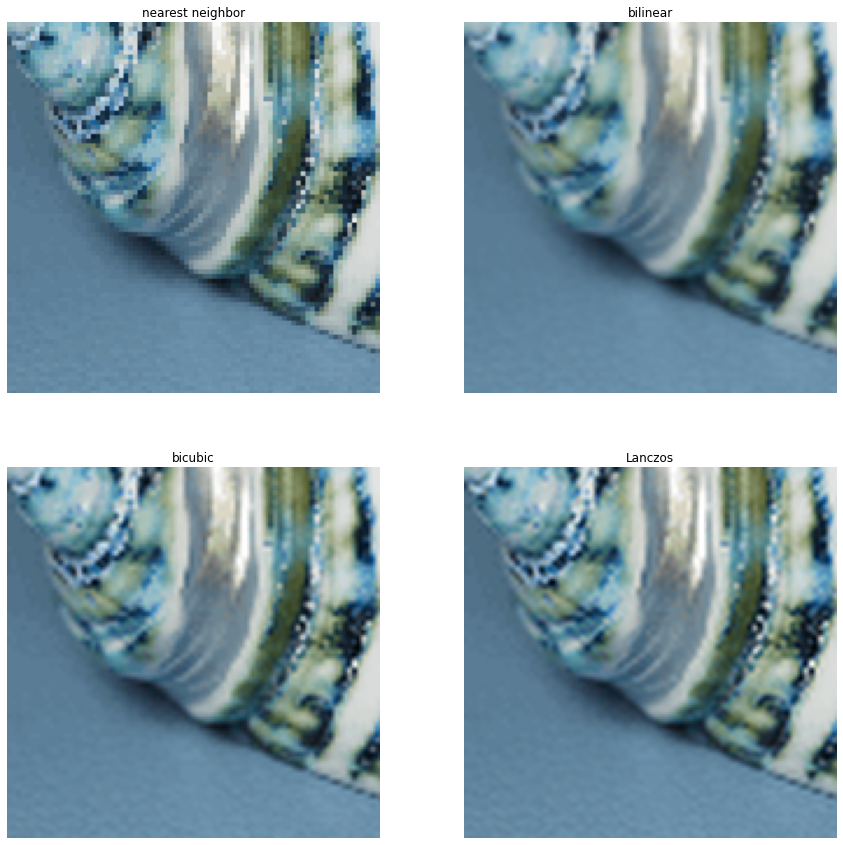

In [24]:
# nearest neighbor interpolation

upscaled_nn = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)[160:319, 0:160]

# bilinear interpolation

upscaled_bl = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)[160:319, 0:160]

# bicubic interpolation

upscaled_bc = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)[160:319, 0:160]

# Lanczos interpolation

upscaled_lc = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LANCZOS4)[160:319, 0:160]

# plot the images in a 2x2 grid

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(upscaled_nn)
plt.title('nearest neighbor')
plt.axis('off')
plt.subplot(222)
plt.imshow(upscaled_bl)
plt.title('bilinear')
plt.axis('off')
plt.subplot(223)
plt.imshow(upscaled_bc)
plt.title('bicubic')
plt.axis('off')
plt.subplot(224)
plt.imshow(upscaled_lc)
plt.title('Lanczos')
plt.axis('off')
plt.show()

## Neural Network based upscaling (2x)

In [27]:
# using OpenCV's super resolution module

# load the model

sr = dnn_superres.DnnSuperResImpl_create()
sr.readModel('EDSR_x4.pb')
sr.setModel('edsr', 2)

# upscale the image

upscaled_edsr = sr.upsample(image)[160:319, 0:160]

# plot the images

plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(upscaled_edsr)
plt.title('EDSR x4')
plt.axis('off')
plt.subplot(122)
plt.imshow(upscaled_lc)
plt.title('Lanczos')
plt.axis('off')
plt.show()


AttributeError: module 'cv2.dnn_superres' has no attribute 'DnnSuperResImpl_create'